In [2]:
import sys
import os

# Add the parent directory to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

# Now you can import from src
from src.data_utils import load_and_process_taxi_data

import pandas as pd

import dagshub
dagshub.init(repo_owner="tejaskolpek", repo_name="taxi_project", mlflow=True)

Initialized MLflow to track repo "tejaskolpek/taxi_project"

Repository tejaskolpek/taxi_project initialized!

In [3]:
rides1 = load_and_process_taxi_data(year=2022)
rides2=(load_and_process_taxi_data(year=2023))
rides = pd.concat([rides1,rides2],ignore_index=True)

File already exists for 2022-01.
Loading data for 2022-01...
Total records: 2,463,931
Valid records: 2,415,141
Records dropped: 48,790 (1.98%)
Successfully processed data for 2022-01.
File already exists for 2022-02.
Loading data for 2022-02...
Total records: 2,979,431
Valid records: 2,921,118
Records dropped: 58,313 (1.96%)
Successfully processed data for 2022-02.
File already exists for 2022-03.
Loading data for 2022-03...
Total records: 3,627,882
Valid records: 3,551,986
Records dropped: 75,896 (2.09%)
Successfully processed data for 2022-03.
File already exists for 2022-04.
Loading data for 2022-04...
Total records: 3,599,920
Valid records: 3,522,113
Records dropped: 77,807 (2.16%)
Successfully processed data for 2022-04.
File already exists for 2022-05.
Loading data for 2022-05...
Total records: 3,588,295
Valid records: 3,509,056
Records dropped: 79,239 (2.21%)
Successfully processed data for 2022-05.
File already exists for 2022-06.
Loading data for 2022-06...
Total records: 3,55

In [4]:
rides

,pickup_datetime,pickup_location_id
0,2022-01-01 00:35:40,142
1,2022-01-01 00:33:43,236
2,2022-01-01 00:53:21,166
3,2022-01-01 00:25:21,114
4,2022-01-01 00:36:48,68
...,...,...
76196384,2023-12-31 23:04:34,233
76196385,2023-12-31 23:08:15,48
76196386,2023-12-31 23:16:15,196
76196387,2023-12-31 23:21:58,140


In [5]:
from src.data_utils import transform_raw_data_into_ts_data

ts_data = transform_raw_data_into_ts_data(rides)
ts_data.head()

,pickup_hour,pickup_location_id,rides
0,2022-01-01 00:00:00,2,0
1,2022-01-01 01:00:00,2,0
2,2022-01-01 02:00:00,2,0
3,2022-01-01 03:00:00,2,0
4,2022-01-01 04:00:00,2,0


In [6]:
prop_df = ts_data[ts_data["pickup_location_id"] == 43]

In [7]:
prop_df.head()

,pickup_hour,pickup_location_id,rides
718320,2022-01-01 00:00:00,43,96
718321,2022-01-01 01:00:00,43,60
718322,2022-01-01 02:00:00,43,22
718323,2022-01-01 03:00:00,43,8
718324,2022-01-01 04:00:00,43,4


In [8]:
import pandas as pd

# Ensure ds column is in datetime format
prop_df['pickup_hour'] = pd.to_datetime(prop_df['pickup_hour'])

# Ensure y column is numeric
prop_df['rides'] = pd.to_numeric(prop_df['rides'])

# Check data
prop_df.head()


C:\Users\kolpe\AppData\Local\Temp\ipykernel_35556\1325073704.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prop_df['pickup_hour'] = pd.to_datetime(prop_df['pickup_hour'])
C:\Users\kolpe\AppData\Local\Temp\ipykernel_35556\1325073704.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prop_df['rides'] = pd.to_numeric(prop_df['rides'])


,pickup_hour,pickup_location_id,rides
718320,2022-01-01 00:00:00,43,96
718321,2022-01-01 01:00:00,43,60
718322,2022-01-01 02:00:00,43,22
718323,2022-01-01 03:00:00,43,8
718324,2022-01-01 04:00:00,43,4


In [9]:
prop_df = prop_df.drop(columns=["pickup_location_id"])
prop_df

,pickup_hour,rides
718320,2022-01-01 00:00:00,96
718321,2022-01-01 01:00:00,60
718322,2022-01-01 02:00:00,22
718323,2022-01-01 03:00:00,8
718324,2022-01-01 04:00:00,4
...,...,...
735835,2023-12-31 19:00:00,55
735836,2023-12-31 20:00:00,72
735837,2023-12-31 21:00:00,50
735838,2023-12-31 22:00:00,28


In [10]:
prop_df = prop_df.rename(columns={'pickup_hour': 'ds', 'rides': 'y'})

# Ensure datetime format
prop_df['ds'] = pd.to_datetime(prop_df['ds'])

# Check the updated DataFrame
prop_df.head()


,ds,y
718320,2022-01-01 00:00:00,96
718321,2022-01-01 01:00:00,60
718322,2022-01-01 02:00:00,22
718323,2022-01-01 03:00:00,8
718324,2022-01-01 04:00:00,4


In [11]:
# !pip install Prophet
from prophet import Prophet
p = Prophet()

p.fit(prop_df)

ModuleNotFoundError: No module named 'prophet'

In [ ]:
# Create a dataframe for the next 12 hours
future = p.make_future_dataframe(periods=12, freq='H')

# Generate forecast
forecast = p.predict(future)

# Display the last 12 predictions
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12))


                       ds        yhat  yhat_lower  yhat_upper
17520 2024-01-01 00:00:00   10.671403  -21.029006   43.899428
17521 2024-01-01 01:00:00    0.065798  -31.465300   33.648750
17522 2024-01-01 02:00:00   -4.088181  -36.968379   27.195648
17523 2024-01-01 03:00:00   -4.186996  -34.045640   27.998784
17524 2024-01-01 04:00:00   -2.427645  -33.430074   28.288414
17525 2024-01-01 05:00:00    1.867972  -27.023854   35.491455
17526 2024-01-01 06:00:00   11.532683  -18.792071   45.359910
17527 2024-01-01 07:00:00   28.173459   -4.700271   58.682496
17528 2024-01-01 08:00:00   49.743311   18.361370   81.542550
17529 2024-01-01 09:00:00   71.773602   39.247829  104.988459
17530 2024-01-01 10:00:00   91.164213   57.014031  122.541721
17531 2024-01-01 11:00:00  108.625398   75.552220  141.624778


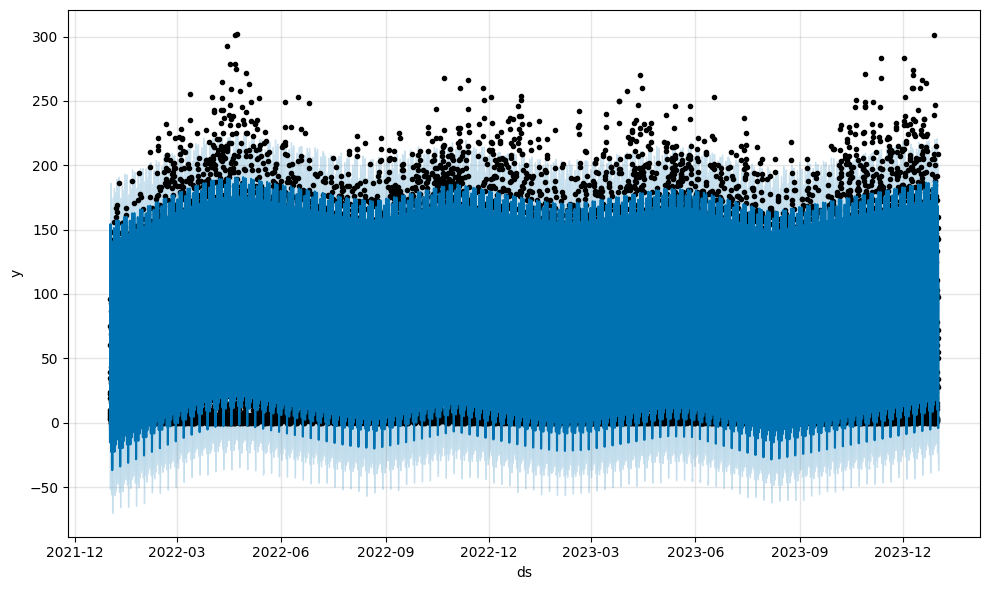

In [ ]:
import matplotlib.pyplot as plt

# Plot forecast
fig = p.plot(forecast)
plt.show()


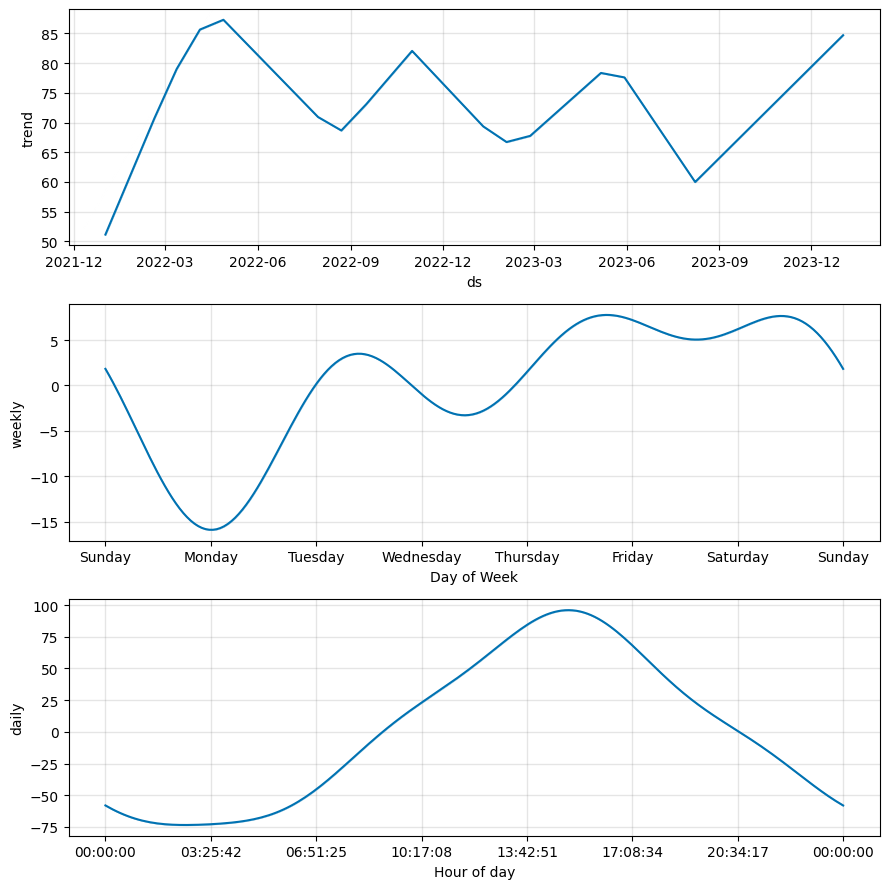

In [ ]:
p.plot_components(forecast)
plt.show()


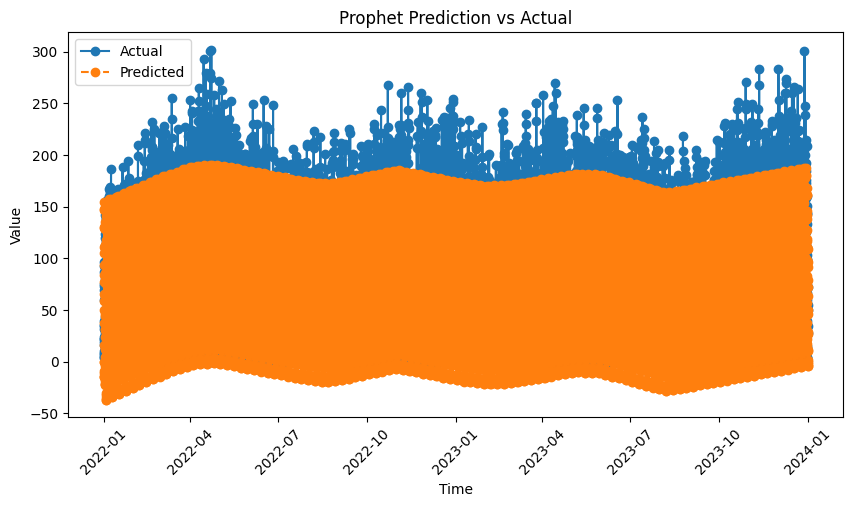

In [ ]:
# Merge actual vs predicted values
results = prop_df.merge(forecast[['ds', 'yhat']], on='ds', how='right')

# Plot actual vs predicted
plt.figure(figsize=(10, 5))
plt.plot(results['ds'], results['y'], label='Actual', marker='o')
plt.plot(results['ds'], results['yhat'], label='Predicted', linestyle='dashed', marker='o')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Prophet Prediction vs Actual')
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error
import numpy as np

# Merge actual values with predicted values
results = prop_df.merge(forecast[['ds', 'yhat']], on='ds', how='inner')

mae = mean_absolute_error(results.dropna()['y'], results.dropna()['yhat'])

print(f"MAE: {mae:.2f}")

MAE: 18.30


In [ ]:
import mlflow
mlflow.set_experiment("Prophet")

# Start an MLflow run
with mlflow.start_run():
        mlflow.log_metric("mean_absolute_error", mae)

2025/03/05 00:51:46 INFO mlflow.tracking.fluent: Experiment with name 'Prophet' does not exist. Creating a new experiment.


🏃 View run adventurous-crab-11 at: https://dagshub.com/siddharthadhikari85/NYC_taxi.mlflow/#/experiments/8/runs/decf5bf4534949ff8772c17c5d8f5cda
🧪 View experiment at: https://dagshub.com/siddharthadhikari85/NYC_taxi.mlflow/#/experiments/8


## Feature Training

In [ ]:
p = Prophet(
    yearly_seasonality=False,  # Disable yearly since it's short-term
    weekly_seasonality=False,  # Disable weekly if not needed
    daily_seasonality=True
)

# Add hourly seasonality (important for 12-hour forecasts)
p.add_seasonality(name='hourly', period=24, fourier_order=12)

# Fit the model again
p.fit(prop_df)


00:51:53 - cmdstanpy - INFO - Chain [1] start processing
00:51:55 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
p = Prophet(changepoint_prior_scale=0.1)  # Default is 0.05, try increasing for more flexibility
p.fit(prop_df)

00:51:59 - cmdstanpy - INFO - Chain [1] start processing
00:52:00 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
future = p.make_future_dataframe(periods=12, freq='H')
forecast = p.predict(future)

In [ ]:
# Merge actual values with predicted values
results = prop_df.merge(forecast[['ds', 'yhat']], on='ds', how='inner')

mae = mean_absolute_error(results.dropna()['y'], results.dropna()['yhat'])
print(f"Updated MAE: {mae:.2f}")

Updated MAE: 18.32
